Indicadores,Resultado
Precio Promedio,$41.01361111111112
Precio más alto,$163.0
Precio mínimo,$2.25


Modelo,Precio,Categoría,Marca
Plancha Supreme Lizze 485 F,163.00,capilar,NaN
"Plancha Digital Hot Tools - 1""",127.30,capilar,Hot Tools
Plancha Black Gold Revolutionary hot tools - 1 1/4,127.30,capilar,Hot Tools
Secadora Aria Dual Gamma Piu - Ionic,122.20,capilar,NaN
Alisador Kera Coffee Vegan de 1000 ml.,117.05,tratamientos,NaN
Alisador Kera Coffee Vegan de 1000 ml.,117.05,capilar,NaN
Máquina Inalámbrica Magic Clip Wahl,112.58,capilar,Wahl
Emulsion Alisadora Maxybelt Libre De Formol - 900 ml,107.81,tratamientos,Maxybelt
Emulsion Alisadora Maxybelt Libre De Formol - 900 ml,107.81,capilar,Maxybelt
Tenaza profesional 2 en 1 Hot Tools,107.70,capilar,Hot Tools


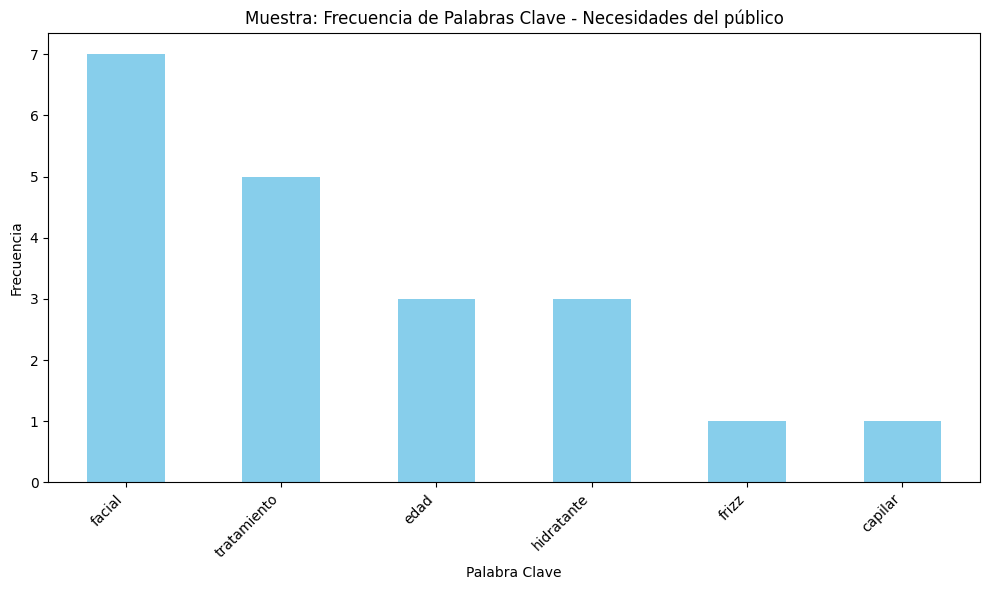

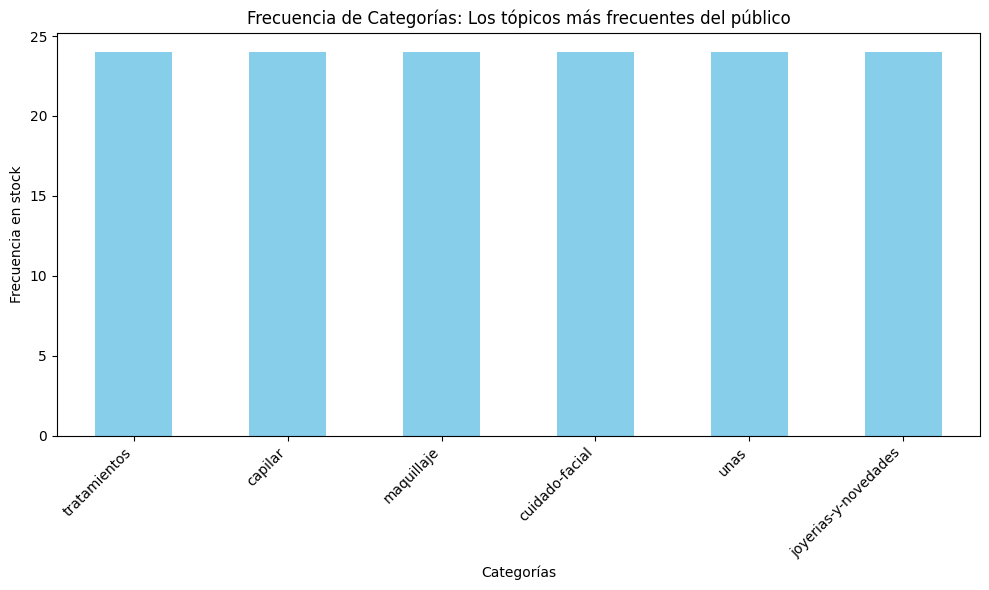

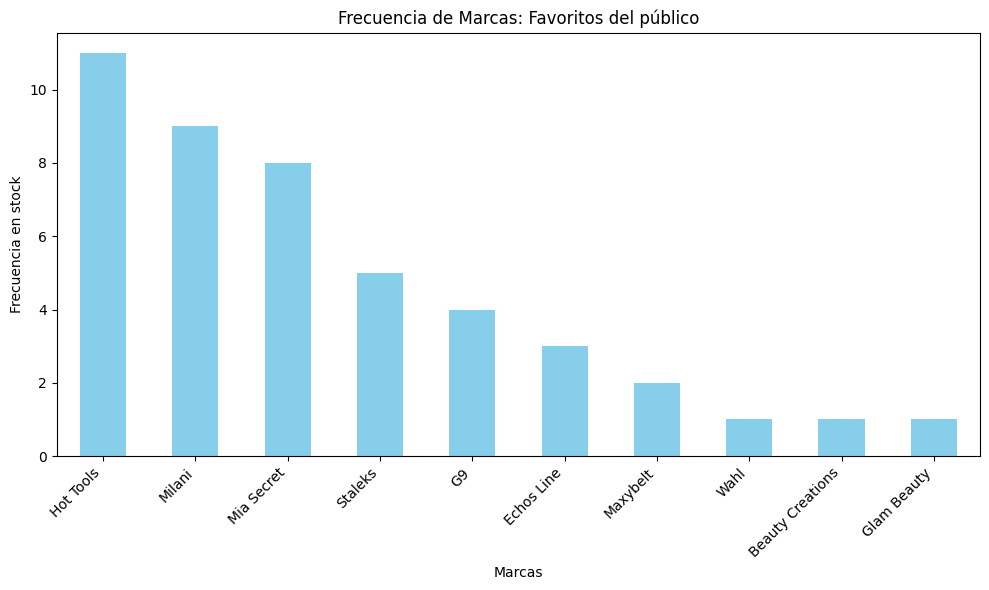

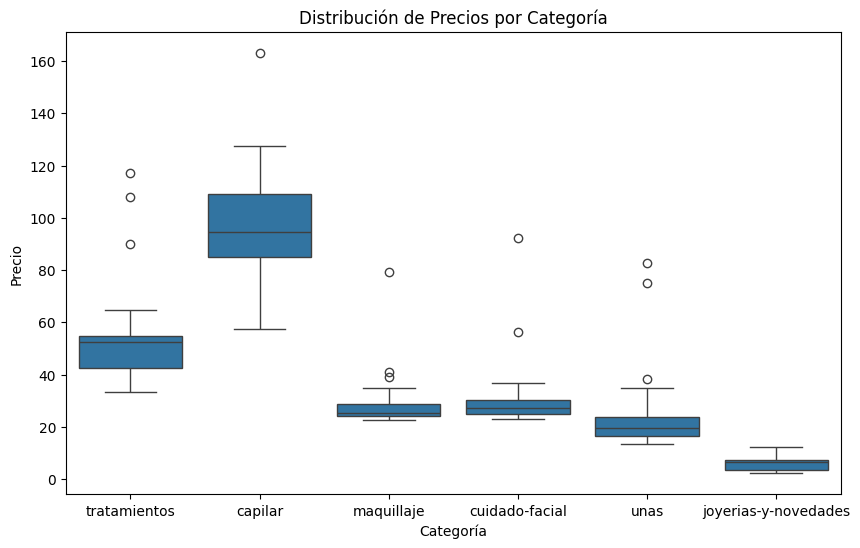

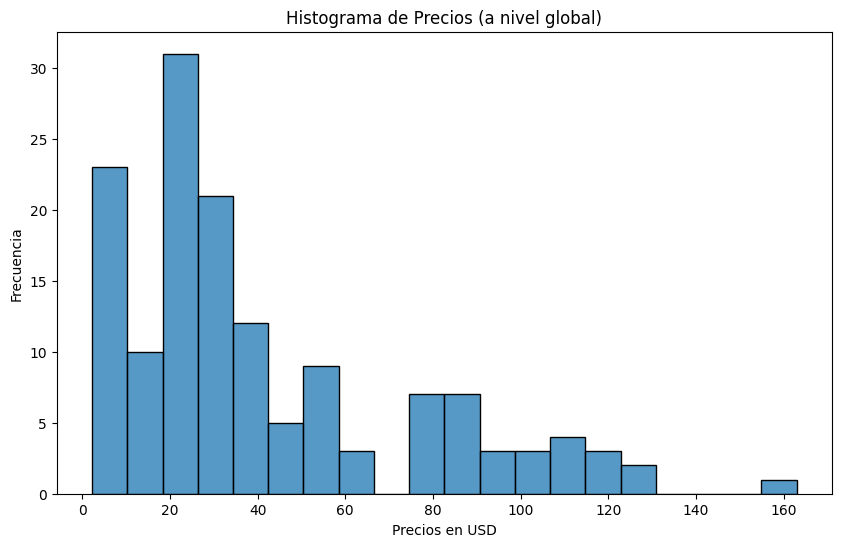

In [1]:
import sys


import pandas as pd # Manipulación de datos
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns
from IPython.display import HTML
from src.analysis.analysis import analyze_data, contar_palabras_clave


data_path = "../data/processed/scraped_all_data"
file_type = ".csv"
read_file_path = f"{data_path}{file_type}"
df = pd.read_csv(read_file_path)

# Analisis general, de marcas y categorías
results = analyze_data(df)

mean_price = results['mean_price']
highest_price = results['highest_price']
min_price = results['min_price']
top_ten_highest_prices = results['top_ten_highest_prices']

frecuencia_total_palabras_clave = results['frecuencia_total_palabras_clave']
frecuencia_marcas = results['frecuencia_marcas']
frecuencia_categorías = results['frecuencia_categorías']

# Mostrar análisis general en forma de tabla HTML
tabla_analisis_general = {
    "Indicadores": ["Precio Promedio", "Precio más alto", "Precio mínimo"],
    "Resultado": [mean_price, highest_price, min_price]
}
tabla_analisis_general = pd.DataFrame(tabla_analisis_general)
t_analisis_general = f"""
<table>
    <tr>
        <th>Indicador</th>
        <th>Valor</th>
    </tr>
    <tr>
        <td>Precio promedio</td>
        <td>{mean_price}</td>
    </tr>
    <tr>
        <td>Precio más alto</td>
        <td>{highest_price}</td>
    </tr>
    <tr>
        <td>Precio mínimo</td>
        <td>{min_price}</td>
    </tr>
</table>

<table>
    <tr>
        <th>Indicador</th>
        <th>Valor</th>
    </tr>
    <tr>
</table>
"""

# Convertir esta variable (un dataframe) a HTML
topten_tabla_html = top_ten_highest_prices.to_html(index=False)
tabla_analisis_general = tabla_analisis_general.to_html(index=False)
analisis_general = f"""
<h3>Análisis General</h3>
"""
top_ten = f"""
<h3>Top 10, precios más altos</h3>
"""
palabras_clave = f"""
<h3>Palabras Clave</h3>
"""
categorias = f"""
<h3>Categorías</h3>
"""
marcas = f"""
<h3>Marcas</h3>
"""
precios = f"""
<h3>Precios</h3>
"""
# Mostrar la tabla html general
display(HTML(analisis_general))
display(HTML(tabla_analisis_general))
# Mostrar la tabla html "top 10"
display(HTML(top_ten))
display(HTML(topten_tabla_html))

# Análisis general
""" print("\n Análisis General:")
print("Precio promedio", mean_price)
print("Precio más alto", highest_price)
print("Precio mínimo", min_price)
print("\n")
print("Top 10, precios más altos")
print(top_ten_highest_prices) """

# Análisis por categorías, marcas, tópicos, precios
# Gráfico de barras: frecuencia de las palabras clave
display(HTML(palabras_clave))
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
frecuencia_total_palabras_clave.sort_values(ascending=False).plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Muestra: Frecuencia de Palabras Clave - Necesidades del público')  # Título del gráfico
plt.xlabel('Palabra Clave')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Mostrar el gráfico

# Gráfico de barras: frecuencia de las categorías
display(HTML(categorias))
plt.figure(figsize=(10, 6))  
frecuencia_categorías.plot(kind='bar', color='skyblue') 
plt.title('Frecuencia de Categorías: Los tópicos más frecuentes del público')  
plt.xlabel('Categorías') 
plt.ylabel('Frecuencia en stock')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()  

# Histograma de frecuencia de marcas
display(HTML(marcas))
plt.figure(figsize=(10, 6))  
frecuencia_marcas.plot(kind='bar', color='skyblue')  
plt.title('Frecuencia de Marcas: Favoritos del público')  
plt.xlabel('Marcas')  
plt.ylabel('Frecuencia en stock')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()  

# Visualización con Boxplot
display(HTML(precios))
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoría', y='Precio', data=df)
plt.title('Distribución de Precios por Categoría')
plt.show()

# Visualización con Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio'], bins=20)
plt.title('Histograma de Precios (a nivel global)')
plt.xlabel("Precios en USD")
plt.ylabel("Frecuencia")
plt.show()


